# Weighted Information Retrieval



In [1]:
!jupyter nbconvert --to html "tf-idf_slides.ipynb"

[NbConvertApp] Converting notebook tf-idf_slides.ipynb to html
[NbConvertApp] Writing 716740 bytes to tf-idf_slides.html


# Inhalt

1. Zone Score Weighting
2. TF-IDF Theorie
3. TF-IDF Implementierung

## Motivation

* Bisher haben wir uns mit Bool'schen Abfragen (boolean retrieval) beschäftigt. 
* Bei dem Ergebnis einer Abfrage gibt es dabei nur zwei Möglichkeiten: entweder ein Dokument trifft darauf zu, oder nicht. * Bei großen Korpora kann die Ergebnismenge einer Abfrage sehr groß sein. Alle diese Dokumente händisch auf Relevanz zu durchsuchen wäre nicht zielführend. 
* Die Aufgabe des Information Retrieval Systems sollte es daher sein, die Ergebnismenge nach _Relevanz_ sortiert zurückzugeben.
* Diese Sortierung wird auch als _Rank-Order_ , bzw. _gewichtete Sortierung_ bezeichnet. Insbesondere bei Suchmaschinen im Internet spielt dies eine wichtige Rolle denn: wer im Internet gefunden werden möchste, sollte bei Google einen hohen Page Rank erzielen.

Literatur: [IR Book, Kapitel 6](https://nlp.stanford.edu/IR-book/pdf/06vect.pdf)

## Einordnung in die Pipeline

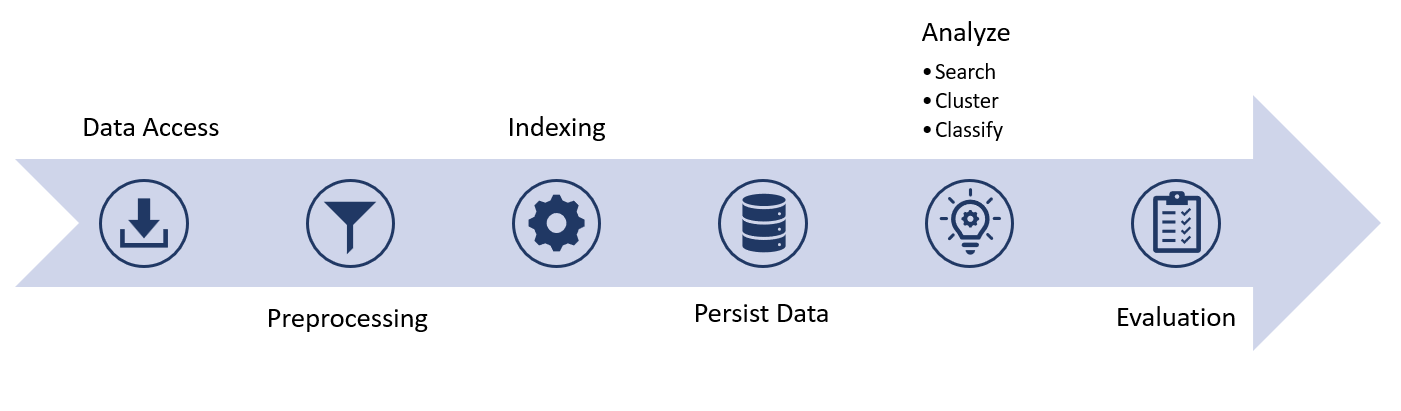

# Zone Score Weighting

* Zone Score Weighting ist eine Möglichkeit, die Ergebnisse Boolean Indexing Verfahren gewichtbar zu machen.
* Um Suchergebnisse zu verbessern, ist es hilfreich das Dokument bei der Indexierung in verschiedene Zonen einzuteilen.
* Eine Zone beschreibt dabei beliebigen Freitext wie zum Beispiel Metadaten wie dem Autor des Dokuments oder bestimmte Kapitel.

* Bei einer Abfrage ist nun die Idee, die Ergebnisse $e$ aus allen Zonen $l$ zu kombinieren. 
* Das Ranking der Ergebnnisse kommt dabei durch die kombinierte Gewichtung der unterschiedlichen Zonen zustande.
* Die Gewichtung $g$ sollte dabei so gewählt werden, dass sie die Relevanz der Zone wiederspiegelt.
* Die Summe aller Gewichte sollte dabei den Wert 1 ergeben. Je kleiner das Gewicht gewählt wird, desto weniger Einfluss hat die Zone auf das Gesamtergebnis.
* Für eine Zone $z_i$ wird die Gewichtung berechnet:
$$ z_i = g_ie_i $$

Für ein Dokument $j$ ist der gewichtete Zonen-Score $s_i$ dann die Summe aus der Gewichtung jeder Zone:
$$ s_j = \sum^{l}_{i=1}{g_ie_i} $$
Dabei soll die Summe der Gewichtung aller Zonen sein:
$$ \sum^{l}_{i=1}{g_i} = 1 $$

Beispiel: Für unseren Index definieren wir die drei Zonen:
* Titel
* Autor
* Kurzfassung

Wir legen als Gewicht $ g_1 $ für den Titel 0.5, $ g_2 $ für den Autor 0.2 und $ g_3 $ 0.3 für die Kurzfassung fest.

 Die Werte hierfür sind frei gewählt. Kommt z.B. bei einer Boolean Abfrage das Wort "Hochschule" in einem Dokument $ j $ nur in seinem Titel vor, wäre sein Score $ s_j $ :
$$ s_j = g_1e_1 + g_2e_2 + g_3e_3 $$
also:
$$ s_j = 0,5 * 1 + 0.2 * 0 + 0,3 * 0 = 0,5$$

Nun berechnen wir diesen Wert für jedes Dokument und können die Ergebnismenge nach dem Zonen-Score $s$ nach Relevanz absteigend sortieren.

## Fazit: Zone Score Weightning

* sehr einfach
* muss manuell eingestellt werden
* kann bereits gute Ergebnisse liefern
* Ergebniss nur so gut wie Konfiguration!!!

# TF-IDF

* Statistisches Verfahren zur Berechnung einer gewichteten Abfrage
* TF-IDF - **T**erm **F**requency - **I**nverse **D**ocument **F**requency

### Use cases:

* Gewichtetes Information Retrieval
* Keyword extraction
* Document Clustering


* Beim Boolean Indexing hing unsere Abfrage lediglich davon ab, ob ein Term in einem Dokument enthalten war oder nicht.
* Mit dem nun vorgestellten Modell soll die Anzahl des Auftretens eines Terms Einfluss gewinnen und die Ergebnisse von Abfragen verbessern.
* Zudem gewinnt auch die Möglichkeit der Sortierung der Ergebnisse an Qualität.

## Wie können wir das besser machen?

* Was hat noch Einfluss?
* Wie bekommen wir die Möglichkeit, die Abfrage nach Relevanz zu sortieren?

**Idee**

* Zählen wie oft jedes Wort pro Dokument vorkommt (term frequency, $tf$).
* Zählen wie oft jedes Wort im gesamten Korpus vorkommt (document frequency, $df$).

* Damit sind jedoch alle Tokens gleichwertig. 
  * In einem Textkorpus aus z.B. der Autoindustrie wird sicherlich in jedem Dokument das Token Auto vorkommen.
  * Welcher Informationsgehalt steckt dann in so einem Token, das in jedem Dokument vorkommt?
  * Es ist anzunehmen, dass so ein Token im Kontext des gesamten Korpus wenig Information über ein einzelnes Dokument liefert.

* Deshalb findet mit der inverse document frequency $idf$ eine Gewichtung der $tf$ statt, abhängig davon, wie oft der Term im gesamten Korpus vorkommt.
* Dadurch wird ein Term abhängig seines Auftretens in dem einzelnen Dokument, sowie auch in Bezug des gesamten Korpus betrachtet.
* Für die Berechnung der $idf$ wird zunächst die document frequency $df$ eines Terms $t$ erstellt:
  * $df_t$: in wie vielen Dokumenten kommt $t$ vor?

* Es wird das Verhältnis der Dokumente berechnet, in denen $t$ mindestens ein Mal vorkommt.
* Anschließend wird der Quotient $df_{t}$ logarithmiert:
$$ idf_t = log \frac{N}{df_t} $$

Durch diese Formel wird erreicht: 
* je häufiger ein Term in verschiedenen Dokumenten auftritt, desto _kleiner_ wird die $idf$. 
* Deshalb wird sie als **inverse** term frequency bezeichnet.
* Warum die Logarithmierung der idf?
  * Es ist entscheidender ob ein Term 1, 2 oder 3 Mal vorkommt, jedoch nicht ob er 11, 12 oder 13 Mal vorkommt

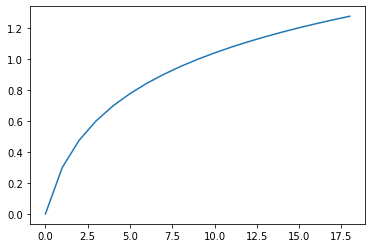

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Beispiel Verlauf des 10er-Logarithmus
l = []
for i in range(1, 20):
    l.append(np.log10(i))
plt.plot(l)

Die TF-IDF von $t$ eines Dokumentes $d$ wird anschließend berechnet:
$$ tfidf = tf_{d,t} * idf_{t} $$

Eine Beispieltabelle bei der TF-IDF Berechnung für das Dokument $d=Deutschland$ könnte folgendermaßen aussehen:

|  **Term** | **TF** | **DF** | **IDF** | **TF-IDF** |
|:---------:|:------:|:------:|:-------:|:----------:|
| bundestag |    8   |    7   |   1,53  |    12,21   |
|   alpen   |    8   |   16   |   1,17  |    9,36    |
|  münchen  |    6   |   103  |   0,36  |    2,15    |


Wir sehen: je seltener ein Term in verschiedenen Dokumenten (DF) auftritt, desto höher ist die IDF.

Beispiel Rechnung für das Token Bundestag:

In [46]:
N = 230
tf = 8
df = 7
idf = np.log10(N/df)
tfidf = tf * idf

print("Die IDF von Bundestag ist", idf)
print("Der TF-IDF Score von Bundestag ist", tfidf)
# Die Ergebnisse weichen aufgrund von Rundungsfehlern geringfügig ab.

Die IDF von Bundestag ist 1.516629796003336
Der TF-IDF Score von Bundestag ist 12.133038368026687


|  **Term** | **TF** | **DF** | **IDF** | **TF-IDF** |
|:---------:|:------:|:------:|:-------:|:----------:|
| bundestag |    8   |    7   |   1,53  |    12,21   |
|   alpen   |    8   |   16   |   1,17  |    9,36    |
|  münchen  |    6   |   103  |   0,36  |    2,15    |

# Aufgaben

1. Schreiben Sie eine Funktion, die den tf-idf Score berechnet. Sie nimmt dabei als Parameter die $tf$, $df$ und $N$ entgegen. Der Score ist der Rückgabewert.
2. Ein Token $t$ kommt in einem Dokument $d$ 5 Mal vor. Die $df$ ist 12, der Korpus besteht aus 34 Dokument. Was ist der tf-idf Score?
3. Ein Token $t$ kommt in einem Dokument $d$ 5 Mal vor. Wie verhält sich sein tf-idf Score in Abhängigkeit von der $df$? Zeichnen Sie dies in einem Diagramm in Python (z.B. mit matplotlib). Nutzen Sie $N=50$.
4. Wie ist der tf-idf Score eines Tokens, das in jedem Dokument eines Korpuses vorkommt?


# TF-IDF Implementierung

#### Data Access und Tokenization

* Schritt 1 und 2 kennen Sie ja bereits bestens. Daher wird hier nicht weiter darauf eingegangen.

#### Berechnung der TF

In [16]:
def get_tf(corpus):
    # computing the tf for each document in the corpus.
    tf = {}
    for name, document in corpus.items():
        tf_d = {}
        for token in document:
            # term freq (tf)
            if token in tf_d:
                tf_d[token] += 1
            else:
                tf_d[token] = 1
        tf[name] = tf_d
    return tf

* Bei der Berechnung der TF wird ein Dictionary zurückgegeben.
* Die Dokumentnamen (Länder) sind die Keys.
* Die Values sind wiederum Dictionaries, die für jedes Token die Frequenz enthalten.

In [44]:
tf = get_tf(documents)
tf_germany = tf["deutschland"]
# sorting by tf descending
dict(sorted(tf_germany.items(), key=lambda item: item[1], reverse=True))

{'deutschland': 256,
 'wurde': 98,
 'deutschen': 91,
 'deutsche': 79,
 'prozent': 76,
 'etwa': 59,
 'wurden': 52,
 '000': 50,
 'jahr': 49,
 '1': 48,
 'deutschlands': 46,
 'bundesrepublik': 44,
 'reich': 42,
 '3': 41,
 'sowie': 39,
 'seit': 36,
 'millionen': 36,
 'ddr': 34,
 'ab': 33,
 'art': 31,
 '2': 31,
 'jahrhundert': 27,
 'mehr': 26,
 'berlin': 25,
 'europäischen': 25,
 'euro': 25,
 'länder': 24,
 'jahren': 23,
 'teil': 23,
 'gg': 23,
 'land': 22,
 '2016': 22,
 '5': 22,
 '9': 22,
 'bevölkerung': 21,
 'recht': 21,
 'milliarden': 21,
 'ländern': 20,
 '6': 20,
 '0': 20,
 '4': 20,
 'deren': 19,
 'welt': 19,
 'gibt': 19,
 '2019': 19,
 'insbesondere': 19,
 'staaten': 18,
 'bund': 18,
 'führte': 18,
 'größte': 17,
 '7': 17,
 '1990': 16,
 'liegt': 16,
 'weitere': 16,
 'eu': 16,
 'gilt': 16,
 'österreich': 16,
 'ende': 16,
 'jahre': 16,
 '8': 16,
 'gemeinden': 16,
 'staat': 15,
 'union': 15,
 'aufgrund': 15,
 'politischen': 15,
 'rund': 15,
 'heute': 15,
 '2020': 15,
 'gebiet': 14,
 '18': 1

### Berechnung der DF und IDF

In [17]:
def get_idf(corpus):
    # do df, then to idf
    df = {}
    for document in corpus.values():
        # important: cast to set here, to count a token for each doc only once!
        document = set(document)
        for token in document:
            if token in df:
                df[token] += 1
            else:
                df[token] = 1

    # do idf
    N = len(documents)
    idf = {token: np.log10(N / d_freq) for token, d_freq in df.items()}
    return idf, df

* Bei der Berechnung der IDF wird ein Dictionary zurückgegeben.
* Alle Tokens des Vokabulars sind die Keys.
* Die Values sind die IDF Werte.

In [45]:
idf, df = get_idf(documents)
# sorting by idf value ascending
dict(sorted(idf.items(), key=lambda item: item[1], reverse=False))

{'wurde': 0.00557987738083662,
 'weblinks': 0.007455882379591995,
 'wurden': 0.007455882379591995,
 'seit': 0.007455882379591995,
 'geschichte': 0.009340026254143432,
 'etwa': 0.0112323799318483,
 '1': 0.013133015271282474,
 'sowie': 0.013133015271282474,
 'teil': 0.015042005078613571,
 'ab': 0.01695942312433533,
 'einzelnachweise': 0.01695942312433533,
 'jahre': 0.018885344160373813,
 '3': 0.018885344160373813,
 'gibt': 0.020819843937573437,
 'jahr': 0.020819843937573437,
 '4': 0.022762999223575567,
 '5': 0.022762999223575567,
 'liegt': 0.024714887821097667,
 'ersten': 0.024714887821097667,
 'jahren': 0.024714887821097667,
 'bevölkerung': 0.024714887821097667,
 'literatur': 0.024714887821097667,
 '2': 0.02667558858662557,
 '6': 0.02667558858662557,
 'zwei': 0.02864518144953001,
 '7': 0.02864518144953001,
 'wirtschaft': 0.03062374743161793,
 'jedoch': 0.03062374743161793,
 '000': 0.03062374743161793,
 'einwohner': 0.03261136866713148,
 'mehr': 0.03460812842320679,
 '0': 0.0346081284232

### Berechnung der TF-IDF eines einzelnen Tokens

In [13]:
# tf-idf
def tfidf_weighting(token, tf_d, idf):
    """
    :param token: The token to compute the weight for.
    :param df: dictionary with the term frequency for each token in the document
    :param idf: the inverse document frequency.
    """
    return tf_d[token] * idf[token]

In [48]:
# TF-IDF Score of most occuring token in document deutschland
tfidf_weighting("wurde", tf["deutschland"], idf)

0.5468279833219887

In [46]:
# TF-IDF Score of typical token in document deutschland
tfidf_weighting("deutschland", tf["deutschland"], idf)

29.027657575053244

## Query TF-IDF: Weighted information retrieval

* Für die Abfrage muss über alle Dokumente interiert werden
* Für jedes Token $t_j$ in der Abfrage $q$ muss der TF-IDF Score für jedes Dokument $d_i$ berechnet werden.
* Wenn $q$ mehrere Tokens enthält, ist der Score die Summe aller Scores für dieses Dokument $i$:
$$ score_i = \sum^{q}_{j=1}{tfidf_{i,j}} $$

In [11]:
def query_tfidf(query):
    # tokenize query
    query = tokenizer.tokenize("paris macron croisant")
    res = pd.DataFrame(columns=["doc", "score"])
    
    # compute tf idf score for each token for each document
    for doc_name, tf_d in tf.items():
        score = 0
        for q in query:
            if q in tf_d:
                score += tfidf_weighting(q, tf_d, idf)
        res = res.append({"doc": doc_name, "score": score}, ignore_index=True)
    # sort result descending
    res.sort_values("score", ascending=False)

,doc,score
55,frankreich,22.570354
34,burkina-faso,5.07745
4,andorra,3.292243
111,libanon,2.784498
229,wallis-et-futuna,2.276753
...,...,...
99,kiribati,0
100,kokosinseln,0
101,kolumbien,0
102,komoren,0


## Keyword extraction

* Der durch TF-IDF erstellte Vektor kann auch für die Keyword-Extraktion genutzt werden.
* Bezeichnet wird damit das automatisierte Finden von Begriffen, die das Dokument treffend beschreiben. 
* Um möglichst treffend zu sein, sollten diese Begriffe sich am besten von denen anderer Dokumente unterscheiden.
* Im Kontext von TF-IDF sind dies die Begriffe, die in diesem Dokument häufig vorkommen, jedoch im Vergleich zu allen Dokumenten eher selten.

Daher sortieren wir alle Tokens in einem Dokument nach ihrem TF-IDF-Score und zeigen die mit den höchsten Werten an:

In [56]:
def get_keywords(doc):
    keywords = pd.DataFrame(columns=["term", "tfidf-score"])
    document = tf[doc]
    for token in tqdm(document):
        score = tfidf_weighting(token, document, idf)
        keywords = keywords.append({"term":token, "tfidf-score": score}, ignore_index=True)
    return keywords.sort_values(by="tfidf-score", ascending=False)
keywords = get_keywords("deutschland")

  0%|          | 0/6029 [00:00<?, ?it/s]

In [52]:
keywords[:10]

,term,tfidf-score
1616,gg,54.534561
81,deutschlands,35.374362
200,ddr,34.973936
0,deutschland,29.027658
8,bundesrepublik,27.068492
3566,bundeskanzler,19.114999
833,nhn,18.968543
27,deutschen,16.960255
139,bund,16.914674
3861,bundeswehr,16.342619


# Aufgaben

In diesen Aufgaben sollen Sie die gezeigte Implementierung von TF-IDF ausprobieren.

1. Laden Sie erneut den Country-Corpus (gerne auch Copy Paste aus vorherigen Übungen)
2. Erstellen Sie TF und IDF Dictionaries.
3. Experimentieren Sie mit verschiedenen Suchen:
  * Mit welcher Abfrage (1 Token) erhalten Sie den besten Score für das Dokument Irland?
  * Was ist der höchste Score den Sie für ein Dokument erzielen?
4. Betrachten Sie die Keyword Extraktion für verschiedene Länder. 
  * Sortieren Sie alle Länder nach Anzahl Tokens.
  * Vergleichen Sie nun die Qualität der Keywörter der 3 längsten Dokumente mit den der 3 kleinsten Dokumente.
  * Notieren Sie Ihre Schlussfolgerung.
5. Score Vergleich mit Elastic Search:
  * Laden Sie den Country Corpus mit der exakt gleichen Vorverarbeitung nach Elastic Search.
  * durchsuchen Sie alle Dokumente nach dem Token "deutschland"in ES und der TF-IDF Implementierung
  * Vergleichen Sie die Scores. Verhalten Sie sich gleich? Haben Sie ähnliche/gleiche Werte für die gleichen Dokumente?